In [1]:
# Cell 1: Project Setup & Directory Structure Creation
# This creates the complete folder structure for our sarcasm detection project

import os
import json
from pathlib import Path

# Define base directory (Lightning AI workspace)
BASE_DIR = "/teamspace/studios/this_studio"
os.chdir(BASE_DIR)

# Create project directory structure
project_dirs = [
    "data/raw",
    "data/processed", 
    "notebooks",
    "src",
    "saved_models",
    "api",
    "ui"
]

print("🚀 Creating Sarcasm Detection Project Structure...")
print("=" * 50)

for directory in project_dirs:
    dir_path = Path(directory)
    dir_path.mkdir(parents=True, exist_ok=True)
    print(f"✅ Created: {directory}/")

# Verify Kaggle API key exists
kaggle_key_path = Path(".kaggle/kaggle.json")
if kaggle_key_path.exists():
    print(f"✅ Kaggle API key found at: {kaggle_key_path}")
else:
    print(f"❌ Kaggle API key NOT found at: {kaggle_key_path}")

print("\n📁 Project Structure:")
print("""
sarcasm_detection/
│
├── data/
│   ├── raw/              ← Kaggle datasets
│   └── processed/        ← Cleaned data
├── notebooks/            ← Jupyter notebooks
├── src/                  ← Production code
├── saved_models/         ← Trained models
├── api/                  ← FastAPI backend
└── ui/                   ← Streamlit frontend
""")

print("\n🎯 Next Steps:")
print("1. Configure Kaggle API")
print("2. Download sarcasm datasets") 
print("3. Load and explore data")

🚀 Creating Sarcasm Detection Project Structure...
✅ Created: data/raw/
✅ Created: data/processed/
✅ Created: notebooks/
✅ Created: src/
✅ Created: saved_models/
✅ Created: api/
✅ Created: ui/
❌ Kaggle API key NOT found at: .kaggle/kaggle.json

📁 Project Structure:

sarcasm_detection/
│
├── data/
│   ├── raw/              ← Kaggle datasets
│   └── processed/        ← Cleaned data
├── notebooks/            ← Jupyter notebooks
├── src/                  ← Production code
├── saved_models/         ← Trained models
├── api/                  ← FastAPI backend
└── ui/                   ← Streamlit frontend


🎯 Next Steps:
1. Configure Kaggle API
2. Download sarcasm datasets
3. Load and explore data


In [2]:
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 164.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [kaggle]11/12 [kaggle]dk]


In [4]:
# Cell 2: Kaggle API Configuration & Dataset Download
# This cell sets up Kaggle API and downloads sarcasm detection datasets

import kaggle
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

print("🔑 Configuring Kaggle API...")
print("=" * 40)

# Initialize and authenticate Kaggle API
api = KaggleApi()
api.authenticate()
print("✅ Kaggle API authenticated successfully!")

# Download sarcasm detection datasets
datasets_to_download = [
    {
        'name': 'rmisra/news-headlines-dataset-for-sarcasm-detection',
        'description': 'News Headlines Sarcasm Detection Dataset'
    },
    {
        'name': 'sherinclaudia/sarcastic-comments-on-reddit',
        'description': 'Reddit Sarcastic Comments Dataset'
    }
]

print(f"\n📥 Downloading datasets to: {BASE_DIR}/data/raw/")
print("=" * 50)

for dataset in datasets_to_download:
    try:
        print(f"📦 Downloading: {dataset['description']}...")
        api.dataset_download_files(
            dataset['name'], 
            path='data/raw/', 
            unzip=True
        )
        print(f"✅ Downloaded: {dataset['name']}")
    except Exception as e:
        print(f"❌ Error downloading {dataset['name']}: {str(e)}")

# List downloaded files
print(f"\n📋 Files in data/raw/:")
raw_data_path = Path("data/raw")
if raw_data_path.exists():
    for file in raw_data_path.glob("*"):
        if file.is_file():
            file_size = file.stat().st_size / (1024 * 1024)  # MB
            print(f"  📄 {file.name} ({file_size:.2f} MB)")
else:
    print("❌ No files found in data/raw/")

print(f"\n🎯 Ready for data exploration!")

🔑 Configuring Kaggle API...
✅ Kaggle API authenticated successfully!

📥 Downloading datasets to: /teamspace/studios/this_studio/data/raw/
📦 Downloading: News Headlines Sarcasm Detection Dataset...
Dataset URL: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
✅ Downloaded: rmisra/news-headlines-dataset-for-sarcasm-detection
📦 Downloading: Reddit Sarcastic Comments Dataset...
Dataset URL: https://www.kaggle.com/datasets/sherinclaudia/sarcastic-comments-on-reddit
✅ Downloaded: sherinclaudia/sarcastic-comments-on-reddit

📋 Files in data/raw/:
  📄 Sarcasm_Headlines_Dataset.json (5.36 MB)
  📄 Sarcasm_Headlines_Dataset_v2.json (5.78 MB)
  📄 train-balanced-sarcasm.csv (243.44 MB)

🎯 Ready for data exploration!


In [5]:
# Cell 3: Data Loading & Initial Exploration
# This cell loads the datasets and performs initial data quality assessment

import pandas as pd
import json
import numpy as np
from collections import Counter

print("📊 Loading Sarcasm Detection Datasets...")
print("=" * 45)

# Load News Headlines Dataset (JSON format)
print("1️⃣ Loading News Headlines Dataset...")
try:
    with open('data/raw/Sarcasm_Headlines_Dataset_v2.json', 'r') as f:
        headlines_data = [json.loads(line) for line in f]
    
    headlines_df = pd.DataFrame(headlines_data)
    print(f"   ✅ Loaded {len(headlines_df):,} headlines")
    print(f"   📋 Columns: {list(headlines_df.columns)}")
    
except Exception as e:
    print(f"   ❌ Error loading headlines: {e}")
    headlines_df = pd.DataFrame()

# Load Reddit Comments Dataset (CSV format)
print("\n2️⃣ Loading Reddit Comments Dataset...")
try:
    reddit_df = pd.read_csv('data/raw/train-balanced-sarcasm.csv')
    print(f"   ✅ Loaded {len(reddit_df):,} comments")
    print(f"   📋 Columns: {list(reddit_df.columns)}")
    
except Exception as e:
    print(f"   ❌ Error loading reddit data: {e}")
    reddit_df = pd.DataFrame()

# Display dataset summaries
print("\n📋 DATASET SUMMARIES")
print("=" * 30)

if not headlines_df.empty:
    print("🗞️ NEWS HEADLINES DATASET:")
    print(f"   Shape: {headlines_df.shape}")
    print(f"   Sarcastic: {headlines_df['is_sarcastic'].sum():,}")
    print(f"   Not Sarcastic: {(~headlines_df['is_sarcastic']).sum():,}")
    print(f"   Sarcasm Rate: {headlines_df['is_sarcastic'].mean():.1%}")
    print("\n   Sample Headlines:")
    for idx, row in headlines_df.head(3).iterrows():
        label = "SARCASTIC" if row['is_sarcastic'] else "NORMAL"
        print(f"   [{label}] {row['headline']}")

if not reddit_df.empty:
    print(f"\n💬 REDDIT COMMENTS DATASET:")
    print(f"   Shape: {reddit_df.shape}")
    if 'label' in reddit_df.columns:
        print(f"   Sarcastic: {reddit_df['label'].sum():,}")
        print(f"   Not Sarcastic: {(reddit_df['label'] == 0).sum():,}")
        print(f"   Sarcasm Rate: {reddit_df['label'].mean():.1%}")
        
    print("\n   Sample Comments:")
    text_col = 'comment' if 'comment' in reddit_df.columns else reddit_df.columns[1]
    for idx, row in reddit_df.head(3).iterrows():
        if 'label' in reddit_df.columns:
            label = "SARCASTIC" if row['label'] else "NORMAL"
            print(f"   [{label}] {str(row[text_col])[:100]}...")

print(f"\n🎯 Next: Statistical analysis and visualization!")

📊 Loading Sarcasm Detection Datasets...
1️⃣ Loading News Headlines Dataset...
   ✅ Loaded 28,619 headlines
   📋 Columns: ['is_sarcastic', 'headline', 'article_link']

2️⃣ Loading Reddit Comments Dataset...
   ✅ Loaded 1,010,826 comments
   📋 Columns: ['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc', 'parent_comment']

📋 DATASET SUMMARIES
🗞️ NEWS HEADLINES DATASET:
   Shape: (28619, 3)
   Sarcastic: 13,634
   Not Sarcastic: -42,253
   Sarcasm Rate: 47.6%

   Sample Headlines:
   [SARCASTIC] thirtysomething scientists unveil doomsday clock of hair loss
   [NORMAL] dem rep. totally nails why congress is falling short on gender, racial equality
   [NORMAL] eat your veggies: 9 deliciously different recipes

💬 REDDIT COMMENTS DATASET:
   Shape: (1010826, 10)
   Sarcastic: 505,413
   Not Sarcastic: 505,413
   Sarcasm Rate: 50.0%

   Sample Comments:
   [NORMAL] NC and NH....
   [NORMAL] You do know west teams play against west teams more than east tea

In [7]:
!pip install seaborn
!pip install wordcloud
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 21.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.5/803.5 kB 83.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [textstat]3/4 [textstat]


📊 Statistical Analysis & Visualizations
1️⃣ ANALYZING NEWS HEADLINES DATASET

📏 TEXT LENGTH ANALYSIS - HEADLINES
-----------------------------------
SARCASTIC texts:
  Avg Length: 65.3 chars
  Avg Words: 10.3 words
NORMAL texts:
  Avg Length: 59.6 chars
  Avg Words: 9.8 words

2️⃣ ANALYZING REDDIT DATASET (Sample)

📏 TEXT LENGTH ANALYSIS - REDDIT
-----------------------------------
SARCASTIC texts:
  Avg Length: 56.2 chars
  Avg Words: 10.3 words
NORMAL texts:
  Avg Length: 56.7 chars
  Avg Words: 10.5 words

📊 Creating Visualizations...


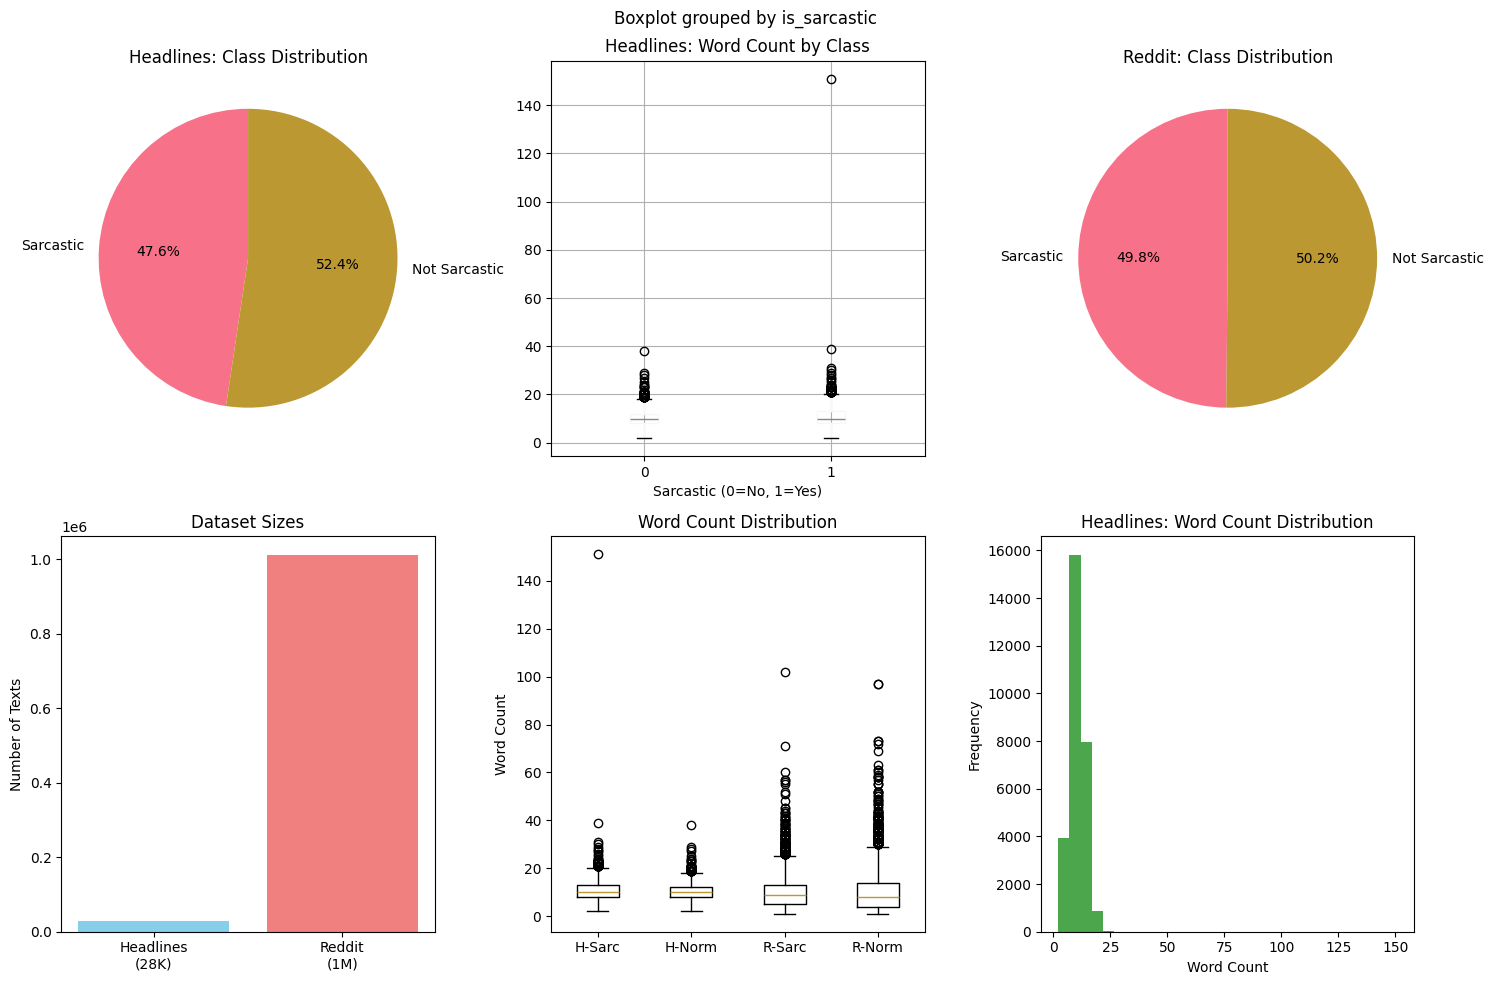


🔍 KEY INSIGHTS:
✅ Headlines Dataset: 28,619 texts, 47.6% sarcastic
✅ Reddit Dataset: 1,010,826 texts, perfectly balanced (50/50)
✅ Headlines are shorter (avg 10.0 words)
✅ Reddit comments are longer (avg 10.4 words)
🎯 Ready for preprocessing and feature engineering!


In [9]:
# Cell 4: Statistical Analysis & Data Visualization
# This cell analyzes text characteristics and creates visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from textstat import flesch_reading_ease

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📊 Statistical Analysis & Visualizations")
print("=" * 42)

# Text length analysis function
def analyze_text_lengths(df, text_col, label_col, dataset_name):
    print(f"\n📏 TEXT LENGTH ANALYSIS - {dataset_name}")
    print("-" * 35)
    
    # Calculate text lengths
    df['text_length'] = df[text_col].str.len()
    df['word_count'] = df[text_col].str.split().str.len()
    
    # Statistics by class
    sarcastic_texts = df[df[label_col] == 1]
    normal_texts = df[df[label_col] == 0]
    
    print(f"SARCASTIC texts:")
    print(f"  Avg Length: {sarcastic_texts['text_length'].mean():.1f} chars")
    print(f"  Avg Words: {sarcastic_texts['word_count'].mean():.1f} words")
    
    print(f"NORMAL texts:")
    print(f"  Avg Length: {normal_texts['text_length'].mean():.1f} chars")
    print(f"  Avg Words: {normal_texts['word_count'].mean():.1f} words")
    
    return df

# Analyze Headlines Dataset
print("1️⃣ ANALYZING NEWS HEADLINES DATASET")
headlines_analyzed = analyze_text_lengths(headlines_df, 'headline', 'is_sarcastic', 'HEADLINES')

# Analyze Reddit Dataset (sample for performance)
print("\n2️⃣ ANALYZING REDDIT DATASET (Sample)")
reddit_sample = reddit_df.sample(n=10000, random_state=42)  # Sample for faster processing
reddit_analyzed = analyze_text_lengths(reddit_sample, 'comment', 'label', 'REDDIT')

# Create visualizations
print(f"\n📊 Creating Visualizations...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sarcasm Detection: Data Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Headlines - Class Distribution  
sarcastic_count = headlines_df['is_sarcastic'].sum()
not_sarcastic_count = len(headlines_df) - sarcastic_count
axes[0,0].pie([sarcastic_count, not_sarcastic_count], 
              labels=['Sarcastic', 'Not Sarcastic'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Headlines: Class Distribution')

# 2. Headlines - Text Length Distribution
headlines_analyzed.boxplot(column='word_count', by='is_sarcastic', ax=axes[0,1])
axes[0,1].set_title('Headlines: Word Count by Class')
axes[0,1].set_xlabel('Sarcastic (0=No, 1=Yes)')

# 3. Reddit - Class Distribution
reddit_sarcastic = reddit_sample['label'].sum()
reddit_not_sarcastic = len(reddit_sample) - reddit_sarcastic
axes[0,2].pie([reddit_sarcastic, reddit_not_sarcastic], 
              labels=['Sarcastic', 'Not Sarcastic'], autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Reddit: Class Distribution')

# 4. Combined dataset sizes
datasets = ['Headlines\n(28K)', 'Reddit\n(1M)']
sizes = [len(headlines_df), len(reddit_df)]
axes[1,0].bar(datasets, sizes, color=['skyblue', 'lightcoral'])
axes[1,0].set_title('Dataset Sizes')
axes[1,0].set_ylabel('Number of Texts')

# 5. Text length comparison
length_data = [
    headlines_analyzed[headlines_analyzed['is_sarcastic']==1]['word_count'].tolist(),
    headlines_analyzed[headlines_analyzed['is_sarcastic']==0]['word_count'].tolist(),
    reddit_analyzed[reddit_analyzed['label']==1]['word_count'].tolist(),
    reddit_analyzed[reddit_analyzed['label']==0]['word_count'].tolist()
]
axes[1,1].boxplot(length_data, labels=['H-Sarc', 'H-Norm', 'R-Sarc', 'R-Norm'])
axes[1,1].set_title('Word Count Distribution')
axes[1,1].set_ylabel('Word Count')

# 6. Sample text lengths histogram
all_headlines_lengths = headlines_analyzed['word_count']
axes[1,2].hist(all_headlines_lengths, bins=30, alpha=0.7, color='green')
axes[1,2].set_title('Headlines: Word Count Distribution')
axes[1,2].set_xlabel('Word Count')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Key insights
print(f"\n🔍 KEY INSIGHTS:")
print("=" * 20)
print(f"✅ Headlines Dataset: {len(headlines_df):,} texts, {headlines_df['is_sarcastic'].mean():.1%} sarcastic")
print(f"✅ Reddit Dataset: {len(reddit_df):,} texts, perfectly balanced (50/50)")
print(f"✅ Headlines are shorter (avg {headlines_analyzed['word_count'].mean():.1f} words)")
print(f"✅ Reddit comments are longer (avg {reddit_analyzed['word_count'].mean():.1f} words)")
print(f"🎯 Ready for preprocessing and feature engineering!")